# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Lab 1: Image Classifier with Keras Sequential API

In [2]:
# Dataset preparation

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# scale input into range 0-1 / 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
def show_mnist_fashion():
    n_rows = 4
    n_cols = 10
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_train[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

In [4]:
# Create model using Sequential API
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Get access to a layer

hidden1 = model.layers[1]
hidden1.name

'dense'

In [6]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [7]:
biases.shape

(300,)

In [8]:
# Compile and train model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 629us/step - loss: 0.9912 - accuracy: 0.6800 - val_loss: 0.5287 - val_accuracy: 0.8156

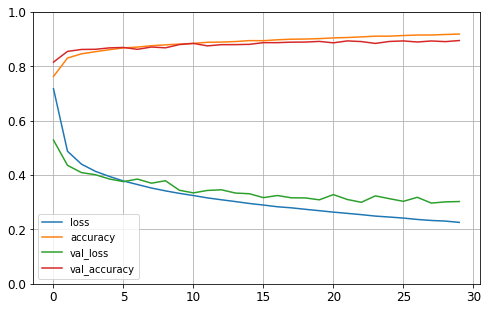

In [9]:
# Learning curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
# Test the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 264us/step - loss: 0.3321 - accuracy: 0.8838


[0.3320755958557129, 0.8838000297546387]

In [ ]:
# Use the trained model to make a prediction

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

In [ ]:
np.array(class_name)[y_pred]

In [ ]:
y_new = y_test[:3]
y_new

# Lab 2 : Regression MLP with Keras Sequential API

## Data preparation

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
print('feature_names:', housing['feature_names'])

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# 연습문제.

## 데이터 로드

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
print('feature_names:', housing['feature_names'])

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Question 1
sequential API를 사용하여 그림과 같이 housing 데이터셋을 이용하여 주택가격을 예측하는 회귀모델을 만드시오. 테스트셋에서의 mse 손실 값을 보이시오.

[Use sequential API, build a regression model as in the figure to predict house value in housing dataset. Report the mse loss on test set.]

* Epoch은 20으로 설정한다. >> epochs = 20
* 넘파이 랜덤 시드를 42로 설정한다. >> np.random.seed(42)
* 텐서플로우 랜덤 시드를 42로 설정한다. >> tf.random.set_seed(42)
* Hidden layer 1: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 2: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 3: Dense layer, 30 neurons, “relu” activation function.

![Q1](https://blog.kakaocdn.net/dn/daQ5Cx/btq8TRATIIO/BjrIIERuz3w6a9zx0gKM2k/img.png)

Test MSE 정답(Ans)은 0.38입니다.

### 1.1 시퀀시 API로 빌드.

In [ ]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1460, 281]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu")
])

tf.random.set_seed(42)

model.summary()

In [ ]:
# Get access to a layer
hidden1 = model.layers[1]
hidden1.name

In [ ]:
weights, biases = hidden1.get_weights()
weights.shape

In [ ]:
biases.shape

### 1.2. 모델 훈련
### 1.2.1 모델 loss와 optimizer 설정

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

### 1.2.2 모델 훈련시키시오.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

### 1.3. 성능 평가하시오
* MSE 사용해 0.38 결과치를 보이시오

In [ ]:
model.evaluate(X_test, y_test)

## Question 2
Functional API 를 사용하여 그림과 같이 housing 데이터셋을 이용하여 주택가격을 예측하는 회귀모델을 만드시오. 테스트셋에서의 mse 손실 값을 보이시오.

[Use functional API, build a regression model as in the figure to predict house value in housing dataset. Report the mse loss on test set]

* Epoch은 20으로 설정한다. >> epochs = 20
* 넘파이 랜덤 시드를 42로 설정한다. >> np.random.seed(42)
* 랜셔플로우 랜덤 시드를 42로 설정한다. >>tf.random.set_seed(42)
* Hidden layer 1: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 2: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 3: Dense layer, 30 neurons, “relu” activation function.

![Q1](https://blog.kakaocdn.net/dn/daQ5Cx/btq8TRATIIO/BjrIIERuz3w6a9zx0gKM2k/img.png)

Test MSE 정답(Ans)은 0.38입니다.

### 2.1 함수형 API로 빌드

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

### 2.1.1 모델 형태 출력하시오.

In [ ]:
model.summary()

### 2.2. 모델 훈련
### 2.2.1 모델 loss와 optimizer 설정

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

### 2.2.2 모델 훈련

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

### 2.3. 성능 평가하시오.
* MSE 사용해 0.38 결과치를 보이시오.

In [ ]:
mse_test = model.evaluate(X_test, y_test)
print("mse_test", mse_test)

## Question 3
Functional API 를 사용하여 그림과 같이 housing 데이터셋을 이용하여 주택가격을 예측하는 회귀모델을 만드시오. 테스트셋에서의 mse 손실 값을 보이시오.

[Use functional API, build a regression model as in the figure to predict house value in housing dataset. Report the mse loss on test set]

* Epoch은 20으로 설정한다. >> epochs = 20
* 넘파이 랜덤 시드를 42로 설정한다. >> np.random.seed(42)
* 랜셔플로우 랜덤 시드를 42로 설정한다. >>tf.random.set_seed(42)
* Hidden layer 1: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 2: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 3: Dense layer, 30 neurons, “relu” activation function.

![Q3](https://blog.kakaocdn.net/dn/lakXN/btq8PvF0lr1/2JiZkLapYjjd1E5ggBqoYK/img.png)

Test MSE 정답(Ans)은 0.37입니다.


### 3.1 함수형 API로 빌드

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

### 3.1.1 모델 형태 출력하시오.

In [ ]:
model.summary()

### 3.2. 모델 훈련
### 3.2.1 모델 loss와 optimizer 설정

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

### 3.2.2 모델 훈련

In [ ]:
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))

### 3.3. 성능 평가하시오.
* MSE 사용해 0.37 결과치를 보이시오.

In [ ]:
mse_test = model.evaluate(X_test, y_test)
print("mse_test", mse_test)